1.1. Импорт библиотек

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.2. Импорт csv-файла

In [42]:
file = 'S02-hw-dataset.csv'
data = pd.read_csv(file, sep = ',')

1.3. Вывод базовой информации

In [43]:
data.head(n = 10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [45]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [46]:
data.mode()

,user_id,age,country,purchases,revenue
0,10.0,24.0,RU,6,0.0
1,NaN,NaN,NaN,7,NaN


2.1. Доля пропусков

In [47]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

2.2. Вывод дублирующихся строк

In [48]:
data.duplicated().tail(n = 5)

36    False
37    False
38    False
39    False
40     True
dtype: bool

In [49]:
data[data.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


2.3. Вывод подозрительных данных

In [50]:
(data['age'].isna()).head(n = 15)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
Name: age, dtype: bool

In [51]:
data[data['age'].isna()]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


In [52]:
((data['age'] < 8) | (data['age'] > 100)).head(n = 25)

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
Name: age, dtype: bool

In [53]:
data[((data['age'] < 8) | (data['age'] > 100))]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [54]:
((data['revenue'] == 0) & (data['purchases'] != 0)).head(n = 15)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
dtype: bool

In [55]:
data[(data['revenue'] == 0) & (data['purchases'] != 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [56]:
data.purchases < 0

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: purchases, dtype: bool

In [57]:
data[data.purchases < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Итог: были обнаружены некоторые ошибки данных - у некоторых пользователей нет возраста, он больше 100 или меньше 8 (нелогично, что человек меньше 8 лет может что-то купить), у одного пользователя было отрицательное количество покупок, ещё был найден пользователь с некоторым количеством покупок, но с нулевым доходом.
Также был найден полный дубликат пользователя.

3.1. Подсчёт частот

In [58]:
data.age.value_counts()

age
24.0     5
52.0     2
31.0     2
28.0     2
39.0     2
35.0     2
47.0     2
32.0     2
25.0     1
55.0     1
43.0     1
45.0     1
26.0     1
23.0     1
51.0     1
18.0     1
54.0     1
5.0      1
21.0     1
42.0     1
33.0     1
22.0     1
57.0     1
36.0     1
20.0     1
46.0     1
120.0    1
34.0     1
Name: count, dtype: int64

In [59]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

3.2. Группировка

In [60]:
group = data.groupby('age')['revenue']
group.median()

age
5.0      1488.0
18.0     1104.0
20.0     1652.0
21.0      650.0
22.0      183.0
23.0      445.0
24.0      511.0
25.0      749.0
26.0     1080.0
28.0      228.0
31.0      548.0
32.0     2041.5
33.0      546.0
34.0     2086.0
35.0      534.0
36.0     2358.0
39.0     1071.0
42.0      904.0
43.0      828.0
45.0      404.0
46.0        0.0
47.0      936.0
51.0      342.0
52.0      550.5
54.0     1302.0
55.0      142.0
57.0      693.0
120.0     785.0
Name: revenue, dtype: float64

In [61]:
group.max()

age
5.0      1488
18.0     1104
20.0     1652
21.0      650
22.0      183
23.0      445
24.0     1115
25.0      749
26.0     1080
28.0      456
31.0      654
32.0     2475
33.0      546
34.0     2086
35.0      738
36.0     2358
39.0     1162
42.0      904
43.0      828
45.0      404
46.0        0
47.0     1440
51.0      342
52.0      702
54.0     1302
55.0      142
57.0      693
120.0     785
Name: revenue, dtype: int64

In [62]:
group.sum()

age
5.0      1488
18.0     1104
20.0     1652
21.0      650
22.0      183
23.0      445
24.0     2137
25.0      749
26.0     1080
28.0      456
31.0     1096
32.0     4083
33.0      546
34.0     2086
35.0     1068
36.0     2358
39.0     2142
42.0      904
43.0      828
45.0      404
46.0        0
47.0     1872
51.0      342
52.0     1101
54.0     1302
55.0      142
57.0      693
120.0     785
Name: revenue, dtype: int64

3.3. Коридоры

In [63]:
age_group = pd.cut(data['age'], [0, 18, 35, 45, 55, 100], labels = ['Children', 'Young', 'Medium', 'Older', 'Oldest'], include_lowest = True)
pd.DataFrame({'age': data['age'], 'age_group': age_group})

,age,age_group
0,25.0,Young
1,24.0,Young
2,52.0,Older
3,31.0,Young
4,NaN,NaN
5,120.0,NaN
6,46.0,Older
7,28.0,Young
8,39.0,Medium
9,24.0,Young


In [64]:
pd.DataFrame({'age': data['age'], 'age_group': age_group}).sort_values('age')

,age,age_group
20,5.0,Children
36,18.0,Children
11,20.0,Young
24,21.0,Young
15,22.0,Young
32,23.0,Young
40,24.0,Young
1,24.0,Young
17,24.0,Young
9,24.0,Young


In [65]:
age_group.value_counts().sort_index()

age
Children     2
Young       21
Medium       6
Older        8
Oldest       1
Name: count, dtype: int64

In [66]:
revenue_group = pd.cut(data['revenue'], 5, labels = ['Lowest', 'Low', 'Medium', 'High', 'Highest'], include_lowest = True)
pd.DataFrame({'country' : data['country'], 'revenue_group' : revenue_group})

,country,revenue_group
0,FR,Low
1,RU,Medium
2,FR,Lowest
3,RU,Low
4,DE,Medium
5,FR,Low
6,RU,Lowest
7,CN,Lowest
8,US,Low
9,RU,Low


In [67]:
pd.DataFrame({'country' : data['country'], 'revenue_group' : revenue_group}).sort_values("revenue_group")

,country,revenue_group
10,US,Lowest
18,RU,Lowest
2,FR,Lowest
35,US,Lowest
34,FR,Lowest
33,FR,Lowest
6,RU,Lowest
7,CN,Lowest
32,US,Lowest
30,FR,Lowest


In [68]:
data.country.value_counts().sort_values()

country
CN     2
DE     6
US     8
FR    12
RU    13
Name: count, dtype: int64

In [69]:
revenue_group.value_counts().sort_index()

revenue
Lowest     14
Low        14
Medium      7
High        3
Highest     3
Name: count, dtype: int64

In [70]:
pd.DataFrame({'age_group': age_group, 'revenue_group' : revenue_group}).value_counts().sort_index() # создаём датафрейм с группами дохода по возрастным группам


age_group  revenue_group
Children   Medium           1
           High             1
Young      Lowest           8
           Low              7
           Medium           2
           High             2
           Highest          2
Medium     Lowest           1
           Low              3
           Medium           1
           Highest          1
Older      Lowest           5
           Low              1
           Medium           2
Oldest     Low              1
Name: count, dtype: int64

In [71]:
pd.DataFrame({'country' : data['country'], 'revenue_group' : revenue_group}).value_counts().sort_index() # создаём датафрейм с группами дохода по странам

country  revenue_group
CN       Lowest           1
         High             1
DE       Low              2
         Medium           2
         Highest          2
FR       Lowest           5
         Low              4
         Medium           2
         High             1
RU       Lowest           4
         Low              4
         Medium           3
         High             1
         Highest          1
US       Lowest           4
         Low              4
Name: count, dtype: int64

Основные наблюдения: основные категории людей - молодые, от 19 до 35 лет. У большинства из них заработок ниже среднего.
Больше всего людей из Франции и России, меньше всего из Китая.
У людей из Дании больше всего людей с самым высоким доходом, у всех людей из США доходы ниже среднего. У людей из России и Франции разные доходы, но больше всего людей с доходами ниже среднего. По людям из Китая мало данных, но видно, что есть и высокий доход, и очень низкий.

4.1. Гистограмма распределения покупок

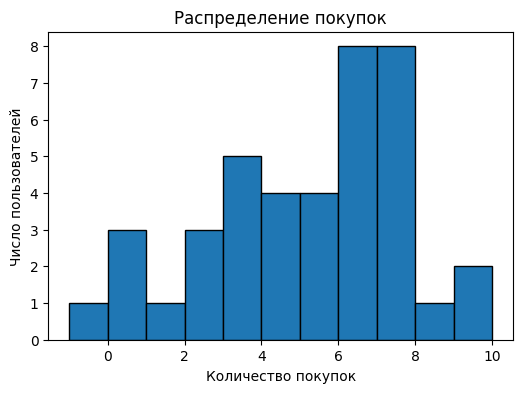

In [72]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.hist(data.purchases.dropna(), np.arange(data.purchases.min(), data.purchases.max()), edgecolor='black') # создаём гистограмму с чёрной обводкой
ax1.set_title('Распределение покупок')
ax1.set_xlabel('Количество покупок')
ax1.set_ylabel('Число пользователей');
plt.savefig('./figures/histogramm.png', dpi=300)

4.2. Боксплот с распределением по возрасту

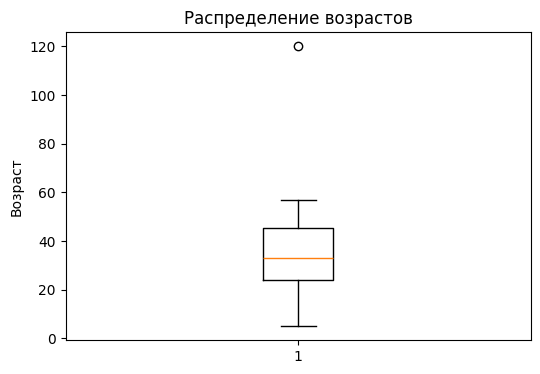

In [73]:
fig, ax2 = plt.subplots(figsize=(6, 4))
ax2.boxplot(data.age.dropna()) # создаём ящик с усами
ax2.set_title('Распределение возрастов')
ax2.set_ylabel('Возраст');
plt.savefig('./figures/boxplot.png', dpi=300)

4.3. Диаграмма рассеяния с зависимостью дохода от количества покупок с отображением возраста

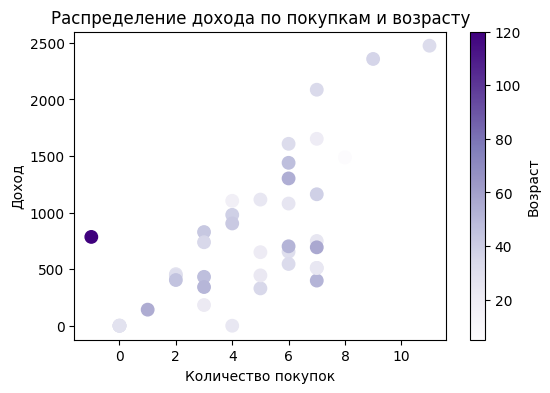

In [74]:
fig, ax3 = plt.subplots(figsize=(6, 4))
sc = ax3.scatter(data.purchases, data.revenue, c=data.age, cmap='Purples', s=80) # создаём диаграмму рассеяния
ax3.set_title('Распределение дохода по покупкам и возрасту')
ax3.set_xlabel('Количество покупок')
ax3.set_ylabel('Доход')
scbar = plt.colorbar(sc, ax=ax3) # создаём цветовую панель
scbar.set_label('Возраст');
plt.savefig('./figures/scatter.png', dpi=300)